In [29]:
import pandas as pd
from pickle import load
from numpy import array
import numpy as np
import pydot
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras import optimizers
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Embedding
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import random
import datetime

def trim_data(data):
     return data[:(len(data)-(len(data)%batch_size))]   

pref = 'traintest/100_' 
X_train = np.load(pref+'x_train_15.npy')
y_train = np.load(pref+'y_train_15.npy')


time_step = 20

batch_size = len(X_train)

### this portion is if you want to specify a specific batch size ###
#batch_size=10
#X_train = trim_data(X_train) 
#y_train = trim_data(y_train)
#batch_size = len(X_train)

In [30]:
X_train.shape

(11590, 20, 28)

<h1> 1 - Training the LSTM </h1>

* we define a stacked model with several LSTM layers, several dense layers, and one output with 2 neurons

In [31]:
# training
lstm_model = Sequential()
lstm_model.add(LSTM(28, batch_input_shape=(batch_size, time_step, X_train.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=False))
#lstm_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True))
#lstm_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True))
#lstm_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True))
#lstm_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(28,activation='sigmoid'))
#lstm_model.add(Dense(14,activation='sigmoid'))
#lstm_model.add(Dense(14,activation='sigmoid'))
#lstm_model.add(Dense(14,activation='sigmoid'))
#lstm_model.add(Dense(14,activation='sigmoid'))
#lstm_model.add(Dense(14,activation='sigmoid'))
lstm_model.add(Dense(y_train.shape[1],activation='sigmoid'))
opt = optimizers.adam()
#opt = optimizers.adam()
lstm_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['acc'])


* since we want out LSTM layers to be stateful within our Epoch but NOT between Epochs, we manually force the Epoch cycle and include a reset_state at the end:

In [32]:
csv_logger = CSVLogger(('logex' + '.log'), append=True)


n_epoch = 1000
for i in range(n_epoch):
    lstm_model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    lstm_model.reset_states()
    if i%10 == 0:
        print("done {} cycles".format(i), datetime.datetime.now())
'''
lstm_model.fit(X_train, y_train, epochs=1000, batch_size=batch_size, verbose=2, shuffle=False)
'''
old_weights = lstm_model.get_weights()

lstm_model.save_weights('stacked_LSTM_weights_15M.h5')


Epoch 1/1
 - 2s - loss: 1.3677 - acc: 0.0148
done 0 cycles 2019-06-05 09:05:00.737872
Epoch 1/1
 - 1s - loss: 1.3515 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.3372 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.3224 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.3060 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.2894 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.2728 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.2561 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.2393 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.2223 - acc: 0.0148
Epoch 1/1
 - 1s - loss: 1.2055 - acc: 0.0148
done 10 cycles 2019-06-05 09:05:07.813255
Epoch 1/1
 - 1s - loss: 1.1883 - acc: 0.0149
Epoch 1/1
 - 1s - loss: 1.1712 - acc: 0.0190
Epoch 1/1
 - 1s - loss: 1.1537 - acc: 0.0427
Epoch 1/1
 - 1s - loss: 1.1362 - acc: 0.1017
Epoch 1/1
 - 1s - loss: 1.1187 - acc: 0.1937
Epoch 1/1
 - 1s - loss: 1.1010 - acc: 0.2797
Epoch 1/1
 - 1s - loss: 1.0833 - acc: 0.3666
Epoch 1/1
 - 1s - loss: 1.0658 - acc: 0.4475
Epoch 1/1
 - 1s - loss: 1.0477 - acc: 0.5300
Epoch 1/1
 - 1s -

 - 1s - loss: 0.1742 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1737 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1736 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1730 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1728 - acc: 0.9705
done 170 cycles 2019-06-05 09:07:06.359337
Epoch 1/1
 - 1s - loss: 0.1723 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1719 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1716 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1713 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1710 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1706 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1703 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1701 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1697 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1695 - acc: 0.9705
done 180 cycles 2019-06-05 09:07:13.526137
Epoch 1/1
 - 1s - loss: 0.1692 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1690 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1686 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1684 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1681 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 

 - 1s - loss: 0.1548 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1547 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1546 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1545 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1546 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1546 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1545 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1546 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1546 - acc: 0.9705
done 340 cycles 2019-06-05 09:09:05.196549
Epoch 1/1
 - 1s - loss: 0.1546 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1545 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1545 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1545 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1542 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1544 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1544 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1544 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1544 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1544 - acc: 0.9705
done 350 cycles 2019-06-05 09:09:12.167878
Epoch 1/1
 - 1s - loss: 0.1544 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 

Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
done 500 cycles 2019-06-05 09:11:02.486869
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 2s - loss: 0.1533 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
done 510 cycles 2019-06-05 09:11:13.971228
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1533 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1

Epoch 1/1
 - 1s - loss: 0.1530 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1530 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
done 670 cycles 2019-06-05 09:13:27.846895
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1530 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
done 680 cycles 2019-06-05 09:13:34.888655
Epoch 1/1
 - 1s - loss: 0.1530 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1532 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1531 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1530 - acc: 0.9705
Epoch 1/1
 - 1

 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1527 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1529 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1527 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1527 - acc: 0.9705
done 840 cycles 2019-06-05 09:15:47.282401
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1527 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1527 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1527 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1528 - acc: 0.9705
done 850 cycles 2019-06-05 09:15:55.427664
Epoch 1/1
 - 1s - loss: 

Epoch 1/1
 - 1s - loss: 0.1519 - acc: 0.9705
Epoch 1/1
 - 1s - loss: 0.1519 - acc: 0.9705


<h1> 2 - test the model </h1>
* the testing will be done wiht a batchsize of 1 (we don't produce a time series but a classification). Problem here is that batchsize will diverge from training, and Keras will not allow that. We must redefine a new model similar to training (except for batchsize) and load weights obtained from training into it.
* then, prediction is executed through a loop

In [33]:
#predicting
X_test = np.load(pref+'x_test_15.npy')
y_test = np.load(pref+'y_test_15.npy')

new_model = Sequential()
new_model.add(LSTM(28, batch_input_shape=(1, time_step, X_train.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,return_sequences=False))
#new_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True,  return_sequences=True))
#new_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True,  return_sequences=True))
#new_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True,  return_sequences=True))
#new_model.add(LSTM(14, dropout=0.0, recurrent_dropout=0.0, stateful=True))
new_model.add(Dropout(0.1))
new_model.add(Dense(28,activation='sigmoid'))
#new_model.add(Dense(14,activation='sigmoid'))
#new_model.add(Dense(14,activation='sigmoid'))
#new_model.add(Dense(14,activation='sigmoid'))
#new_model.add(Dense(14,activation='sigmoid'))
#new_model.add(Dense(14,activation='sigmoid'))
new_model.add(Dense(y_train.shape[1],activation='sigmoid'))
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [34]:
#new_model.load_weights('stacked_LSTM_weights_15M.h5')
new_model.set_weights(old_weights)

#res = new_model.predict(X_test, batch_size = len(X_test), verbose=0, steps= None)

# modele returns a triplet of pred: X-Y-Z with X being neither L or H, Y being low, Z being high

pred1 = []
pred2 = []
for i in range(len(X_test) - 1):
    X_test_solo= X_test[i]
    X_test_solo = X_test_solo.reshape(1,time_step, X_test.shape[2])
    res = new_model.predict(X_test_solo, batch_size = 1, verbose=0, steps= None)
    pred1.append(float(res[0][1]))
    pred2.append(float(res[0][2]))


<h1> 3 - combine results </h1>


In [35]:
# analysing

pred = pd.DataFrame()
pred["result_buy"] = pred1
pred["result_sell"] = pred2
pred["true_buy"] = pd.DataFrame(y_test)[1]
pred["true_sell"] = pd.DataFrame(y_test)[2]
pred.to_csv(pref+'test_pred.csv')


confusion matrix on buy: 
[[  10  368]
 [  22 1906]]
confusion matrix on sell: 
[[  13  633]
 [  19 1641]]


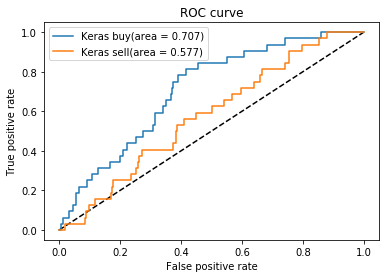

In [99]:
# define the level of confidence we want to declare our prediction a high or a low
pred = pd.read_csv("traintest/100_test_pred.csv", index_col=0)
thresh_buy = 0.02
thresh_sell = 0.015
# enrich our prediction with Buy/sell as 1 or 0
pred["buy?"] = pred["result_buy"].apply(lambda x: 1 if x >= thresh_buy else 0)
pred["sell?"] = pred["result_sell"].apply(lambda x: 1 if x >= thresh_sell else 0)
# produce a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("confusion matrix on buy: \n{}".format(confusion_matrix(pred["buy?"], pred["true_buy"], labels=[1,0])))
print("confusion matrix on sell: \n{}".format(confusion_matrix(pred["sell?"],pred["true_sell"],  labels=[1,0])))
# produce a ROC curve
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(pred["true_buy"], pred["result_buy"])
fpr_keras2, tpr_keras2, thresholds_keras2 = roc_curve(pred["true_sell"], pred["result_sell"])
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras2 = auc(fpr_keras2, tpr_keras2)
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras buy(area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Keras sell(area = {:.3f})'.format(auc_keras2))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

pred.to_csv("traintest/100_100_test_pred.csv")

<h1> 4 - Measure profit with my estimate </h1>

* loop through our test set. 
* Whenever I predicted a "Buy", consider I buy
* On next predicted "sell", consider I seel, and capture profit

In [100]:
pred.sort_values('result_buy', ascending=False)
#pred[pred["true_buy"]==1].sort_values('result_buy', ascending=False)



,result_buy,result_sell,true_buy,true_sell,buy?,sell?
1074,0.058083,0.028677,0.0,0.0,1,1
658,0.053230,0.038346,0.0,0.0,1,1
902,0.050538,0.026159,0.0,0.0,1,1
890,0.046957,0.024239,0.0,0.0,1,1
1819,0.046664,0.028007,0.0,0.0,1,1
887,0.045847,0.023208,0.0,0.0,1,1
958,0.044734,0.023136,0.0,0.0,1,1
924,0.044199,0.022332,0.0,0.0,1,1
499,0.043028,0.023016,0.0,0.0,1,1
898,0.042814,0.023613,0.0,0.0,1,1


In [101]:
test = pd.read_csv("traintest/test_data_backup_15M.csv", index_col=None).reindex()
pred = pd.read_csv("traintest/100_100_test_pred.csv", index_col=0)
#print(len(test),len(pred))

In [102]:
test.is_l1000.sum()

32

In [103]:
#test = pd.read_csv("traintest/test_data_backup.csv", index_col=None).reindex()

liste1 = list(pred.true_buy)
liste2 = list(test.is_l1000.shift(periods=3,fill_value=0))
liste3 = list(pred["buy?"])
liste1.extend([0])
liste3.extend([0])
liste1 = pd.Series(liste1)
liste2 = pd.Series(liste2)
liste3 = pd.Series(liste3)
TF = liste1 == liste2
test["buy?"] = liste3
test["true1"] = TF

liste1 = list(pred.true_sell)
liste2 = list(test.is_h1000.shift(periods=3,fill_value=0))
liste3 = list(pred["sell?"])

liste1.extend([0])
liste3.extend([0])

liste1 = pd.Series(liste1)
liste2 = pd.Series(liste2)
liste3 = pd.Series(liste3)

TF = liste1 == liste2
test["sell?"] = liste3
test["true2"] = TF

test = test[(test["true1"]==True) & (test["true2"]==True) ]

In [104]:
TF

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

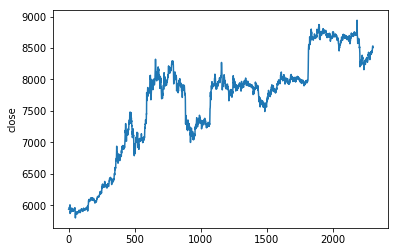

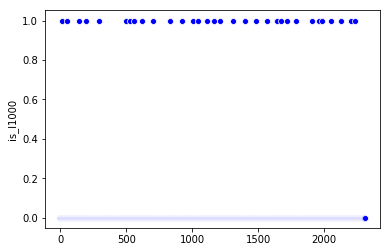

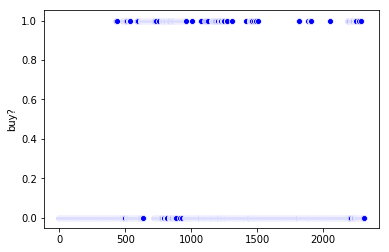

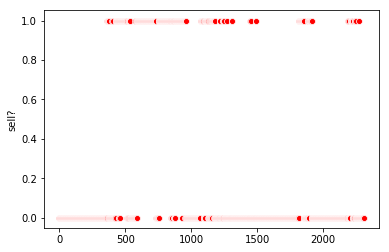

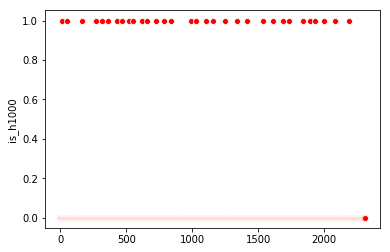

In [105]:
graph = test[:]
sns.lineplot(graph.index[:],graph.close[:])
#sns.lineplot(graph.index[:],graph.ma20[:])
#sns.lineplot(graph.index[:],graph.ma100[:])
#sns.lineplot(graph.index[:],graph.ma500[:])
#sns.lineplot(graph.index[:],graph.ma1000[:])

#sns.lineplot(graph.index[:],graph[:].close.rolling(window=500, min_periods=1).mean())
#sns.lineplot(graph.index[:],graph[:].close.rolling(window=100, min_periods=1).mean())
#sns.lineplot(graph.index[:],graph[:].close.rolling(window=20).mean())
plt.show()
#sns.lineplot(graph.index[:],graph[:].buyer_is_maker)
plt.show()
sns.scatterplot(graph.index,graph["is_l1000"], color='blue')
plt.show()
sns.scatterplot(graph.index,graph["buy?"], color='blue')
plt.show()
sns.scatterplot(graph.index,graph["sell?"], color='red')
plt.show()
sns.scatterplot(graph.index,graph["is_h1000"], color="red")
plt.show()

In [106]:
test["close"].describe()

count    2307.000000
mean     7643.515453
std       817.054032
min      5800.860000
25%      7189.240000
50%      7892.160000
75%      8067.715000
max      8941.250000
Name: close, dtype: float64

In [107]:
check_steps = [1,100,1000,10000,30000]
test["profit"] = 0
test["immo_time"] = 0
look_for = 'sell'
buy_price = float(test.head(1).open.values)
print("start with",buy_price)
test["look_for"] = look_for
buy_time = 0
for i in test.index:
    test.loc[i,"look_for"] = look_for
    if look_for == 'buy' and test.loc[i,"buy?"]==1:
#    if look_for == 'buy' and test.loc[i,"cons_buy"]==18:
        buy_price = test.loc[i,"close"]
        buy_time = i
        look_for = "sell"
        print("bought on:", i,buy_price)
#    elif look_for == 'sell' and (test.loc[i,"sell?"]==1 and test.loc[i,"close"] / buy_price > 1.05) :
    elif look_for == 'sell' and test.loc[i,"close"] / buy_price > 1.08:
# and test.loc[i,"close"] / buy_price >1.01
        test.loc[i,"profit"] = 0.9985*test.loc[i,"close"] - buy_price # a penalty of 1% is applied to represent trade fees applied by excahnge  platform
        test.loc[i,"immo_time"] = i - buy_time
        look_for = "buy"
        print("sold on", i, test.loc[i,"close"])

#    if i in check_steps:
#        print("over {}".format(i),datetime.datetime.now())    
pd.options.display.max_rows = 999

print("profit achieved:", round((test["profit"].sum() ) / float(test.tail(1).open.values) *100,2),"%", "average investment time:", test["immo_time"].mean()/4/24,"days")
print("vs. organic market growth =>", round((float(test.tail(1).close.values) - float(test.head(1).open.values)) / float(test.head(1).open.values) *100,2),"%")
  

start with 5948.91
sold on 310 6424.83
bought on: 428 7163.93
sold on 591 7791.28
bought on: 594 7771.91
sold on 1817 8480.0
bought on: 1818 8520.0
profit achieved: 20.83 % average investment time: 0.007657852911428984 days
vs. organic market growth => 43.02 %


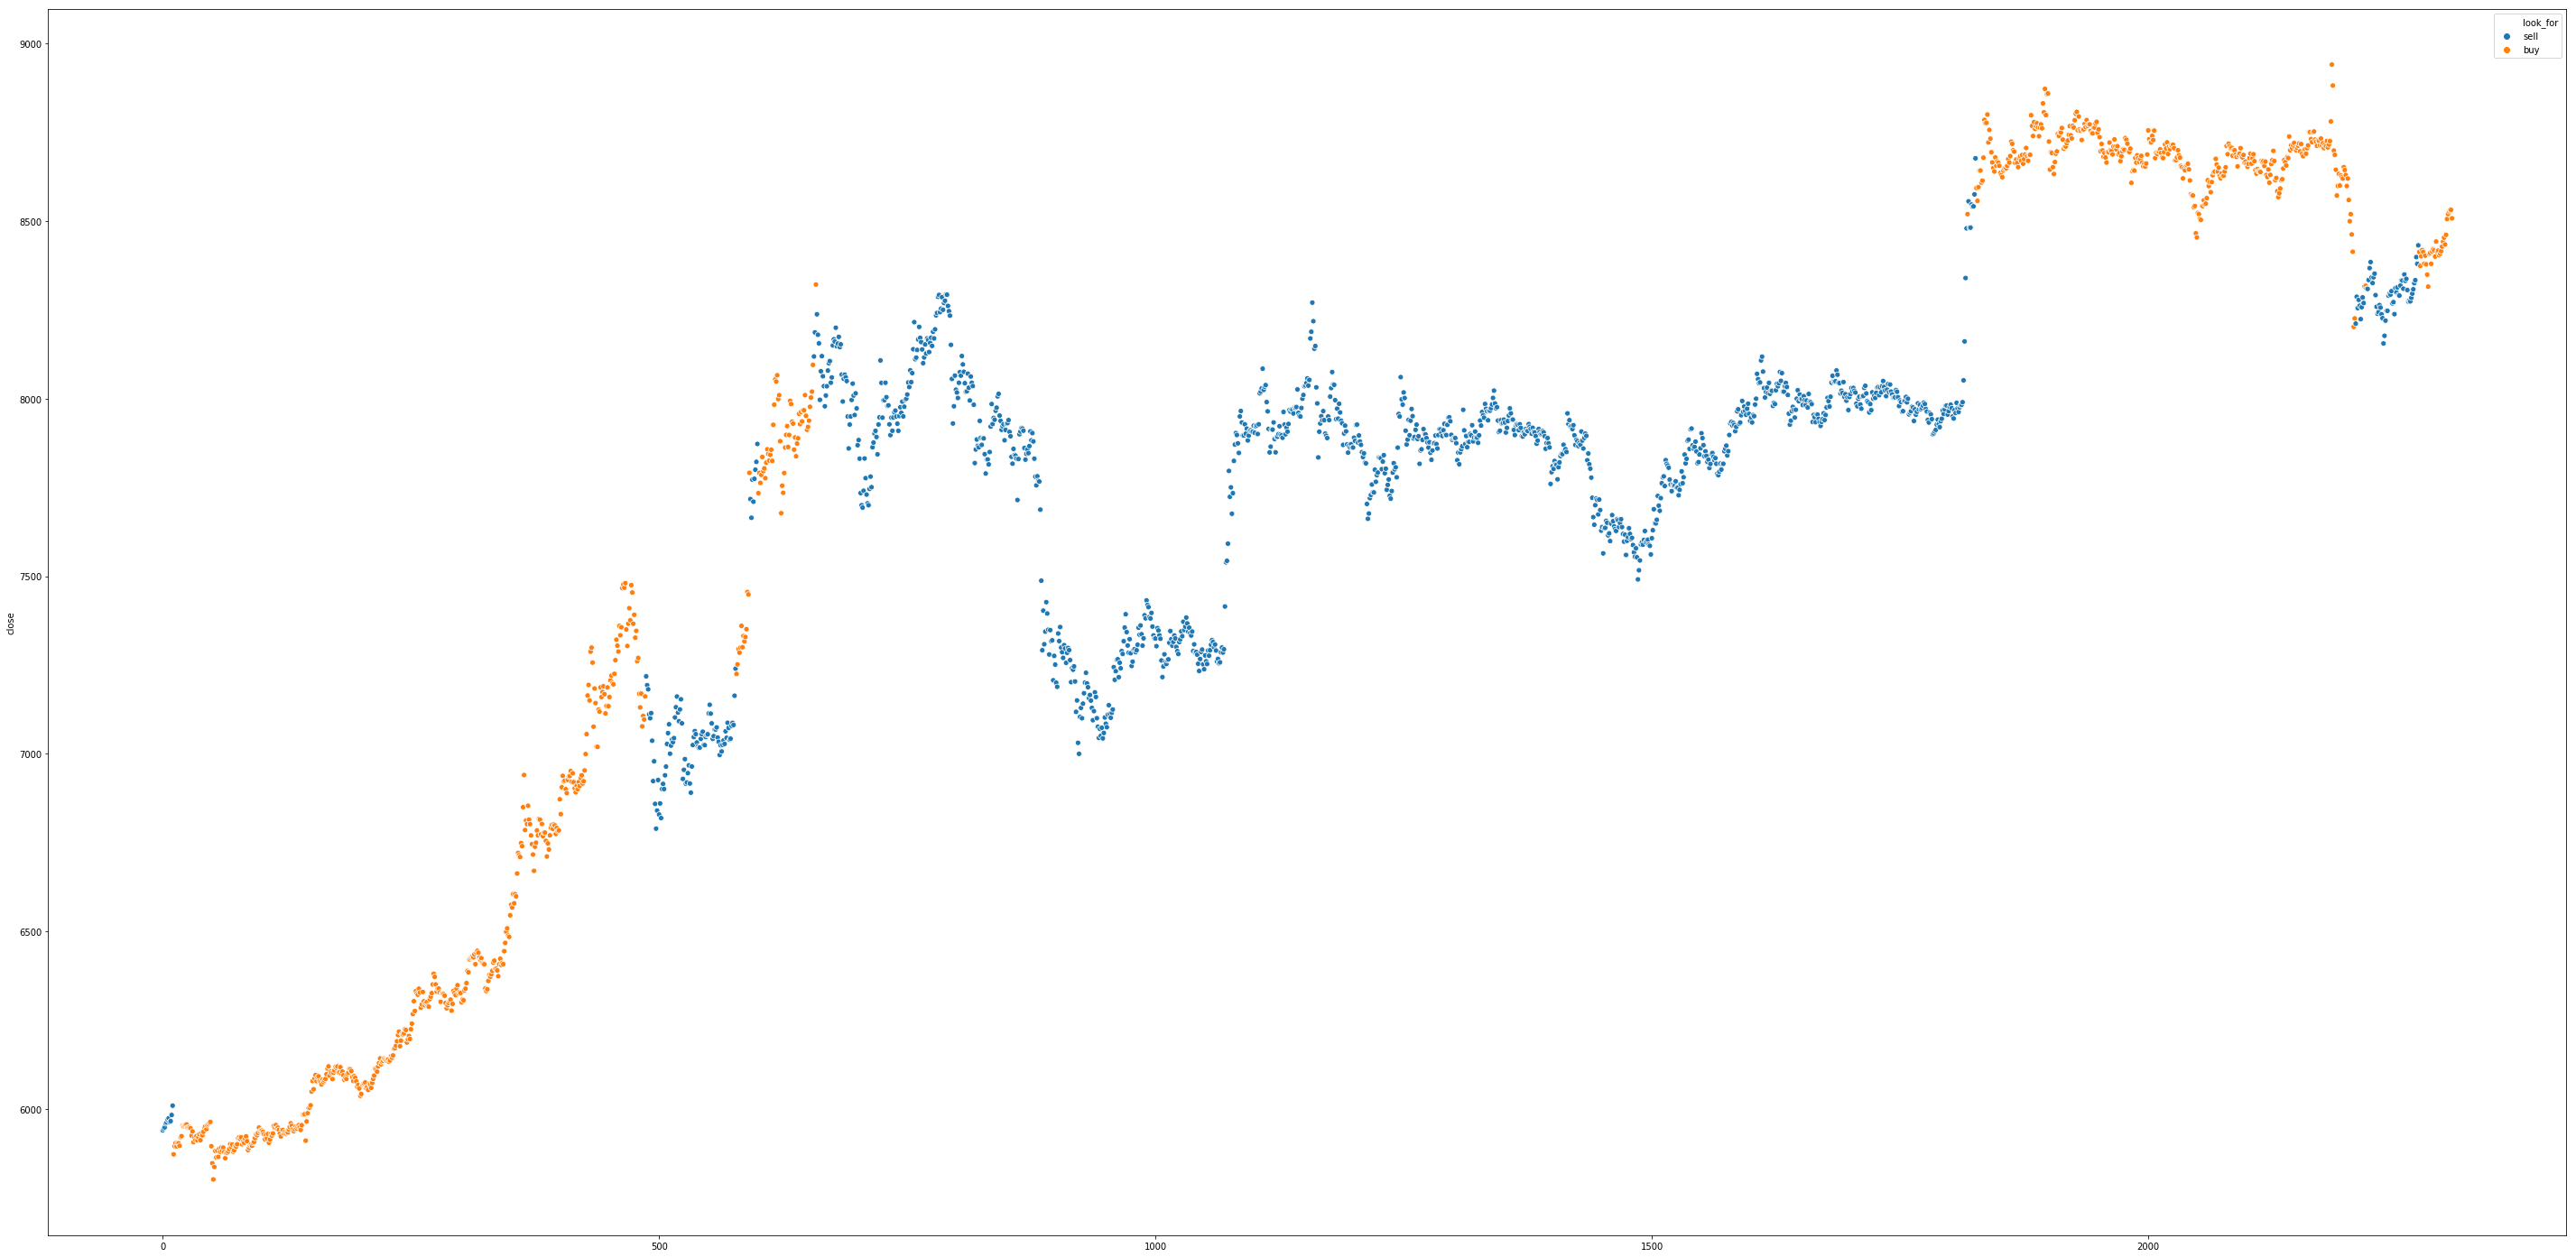

In [96]:
graph=test.loc[:,:] 
fig, ax = plt.subplots(figsize=(50,25))
sns.scatterplot(graph.index, graph.close, hue = graph.look_for)


In [97]:
test[test["profit"]!=0]

,Unnamed: 0,openTime,close,closeTime,high,low,numTrades,open,openTime.1,quoteVolume,...,h1000,is_l1000,is_h1000,history,buy?,true1,sell?,true2,immo_time,look_for
10,13774,2019-05-07 15:45:00,6008.70,2019-05-07 15:45:59.999,6013.61,5999.92,1.420350,5982.33,2019-05-07 15:45:00,3.178925e+05,...,6008.70,0,1,[[ 2.19977296e+00 9.28711039e-02 7.81969057e...,0,True,0,True,10,sell
577,14341,2019-05-13 13:30:00,7239.67,2019-05-13 13:30:59.999,7260.00,7249.57,4.466615,7166.54,2019-05-13 13:30:00,2.279436e+06,...,7872.68,0,0,[[ 2.11010951e+00 -5.14952481e+00 7.81969057e...,0,True,1,True,91,sell
599,14363,2019-05-13 19:00:00,7872.68,2019-05-13 19:00:59.999,7877.00,7841.55,3.023104,7818.38,2019-05-13 19:00:00,4.017367e+05,...,8066.09,0,0,[[ 4.71000740e+00 8.51852933e-01 7.81969057e...,0,True,1,True,8,sell
657,14421,2019-05-14 09:30:00,8186.82,2019-05-14 09:30:59.999,8210.20,8176.60,4.467702,8119.44,2019-05-14 09:30:00,4.415349e+05,...,8321.66,0,0,[[ 9.03301783 -1.97982695 0.78196906 4.14595...,1,True,1,True,2,sell
1817,15622,2019-05-26 21:45:00,8480.00,2019-05-26 21:45:59.999,8499.00,8479.96,6.327527,8340.01,2019-05-26 21:45:00,7.560391e+05,...,8800.60,0,0,[[ 2.13716079e-01 -1.47292432e-01 7.81969057e...,1,True,1,True,1159,sell
1826,15631,2019-05-27 00:00:00,8677.22,2019-05-27 00:00:59.999,8677.22,8645.94,2.991038,8574.13,2019-05-27 00:00:00,1.923075e+05,...,8800.60,0,0,[[ 2.80450328e-01 7.78269998e-02 7.81969057e...,0,True,1,True,8,sell
2218,16023,2019-05-31 02:00:00,8316.54,2019-05-31 02:00:59.999,8338.00,8321.51,2.774728,8267.10,2019-05-31 02:00:00,2.070532e+05,...,8652.27,0,0,[[-7.69486505e-02 -4.89824761e+00 7.81969057e...,1,True,1,True,10,sell
2272,16077,2019-05-31 15:30:00,8432.12,2019-05-31 15:30:59.999,8435.01,8418.52,1.318173,8381.46,2019-05-31 15:30:00,2.913907e+05,...,8442.80,0,0,[[ 0.64549237 -9.42055952 0.78196906 0.46652...,0,True,0,True,53,sell


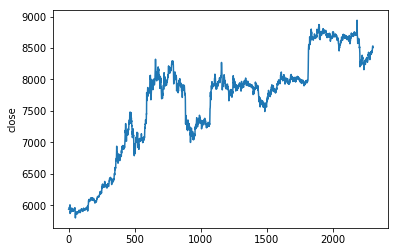

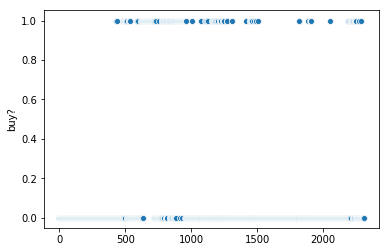

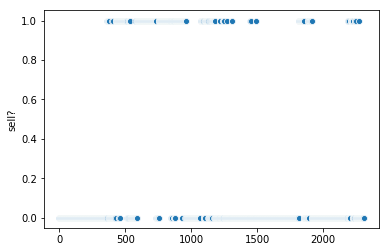

In [81]:

sns.lineplot(x=test.index,y=test.close)
plt.show()
sns.scatterplot(x=test.index,y=test["buy?"])
plt.show()
sns.scatterplot(x=test.index,y=test["sell?"])
plt.show()

In [117]:
685 / 5354

0.12794172581247665

In [299]:
16000 / 60 / 24

11.111111111111112

In [311]:
test[test["is_l100"]==1]

,Unnamed: 0,openTime,close,closeTime,high,low,numTrades,open,openTime.1,quoteVolume,...,is_h100,buyer_is_maker,history,buy?,true1,sell?,true2,profit,immo_time,look_for
92,13856,2019-05-08 12:15:00,5906.73,2019-05-08 12:15:59.999,5909.67,5906.33,-0.298168,5902.07,2019-05-08 12:15:00,4.120813e+04,...,0,0.206007,[[ 2.66241834 2.72929908 2.71340212 2.52921...,0,True,0,True,0.0,0,sell
132,13896,2019-05-08 22:15:00,5936.49,2019-05-08 22:15:59.999,5943.03,5939.34,-0.709047,5941.41,2019-05-08 22:15:00,1.261969e+05,...,0,1.877204,[[ 2.7145143 2.72090155 2.74321042 2.57009...,1,True,0,True,0.0,0,sell
145,13909,2019-05-09 01:30:00,5964.17,2019-05-09 01:30:59.999,5981.50,5972.01,0.723051,5910.07,2019-05-09 01:30:00,1.061668e+06,...,0,0.348824,[[ 2.72554976e+00 2.72344236e+00 2.74877133e...,1,True,0,True,0.0,0,sell
150,13914,2019-05-09 02:45:00,6048.26,2019-05-09 02:45:59.999,6073.33,6038.34,1.536657,6009.72,2019-05-09 02:45:00,1.352304e+05,...,0,-0.284484,[[ 2.73349194 2.72567646 2.75190313 2.58870...,1,True,0,True,0.0,0,sell
212,13976,2019-05-09 18:15:00,6084.12,2019-05-09 18:15:59.999,6090.00,6085.61,-0.058489,6073.81,2019-05-09 18:15:00,1.676773e+05,...,0,-0.547983,[[ 2.93417691 2.88477048 2.80510879 2.66696...,0,True,0,True,0.0,0,sell
216,13980,2019-05-09 19:15:00,6104.40,2019-05-09 19:15:59.999,6119.00,6110.50,-0.007944,6108.30,2019-05-09 19:15:00,1.068534e+05,...,0,-1.190694,[[ 2.92492472 2.89335697 2.80851914 2.67184...,0,True,0,True,0.0,0,sell
217,13981,2019-05-09 19:30:00,6119.23,2019-05-09 19:30:59.999,6121.00,6118.03,-0.232949,6108.92,2019-05-09 19:30:00,4.015728e+04,...,0,-0.539829,[[ 2.92175381 2.89571769 2.80942134 2.67308...,0,True,0,True,0.0,0,sell
221,13985,2019-05-09 20:30:00,6131.74,2019-05-09 20:30:59.999,6133.67,6129.01,-0.243275,6125.40,2019-05-09 20:30:00,9.513776e+04,...,0,0.483156,[[ 2.9142386 2.90396872 2.81302416 2.67806...,0,True,0,True,0.0,0,sell
228,13992,2019-05-09 22:15:00,6132.27,2019-05-09 22:15:59.999,6139.53,6135.81,-0.463933,6138.89,2019-05-09 22:15:00,3.219243e+04,...,0,-0.768225,[[ 2.93891909 2.92242135 2.82038994 2.68737...,0,True,0,True,0.0,0,sell
235,13999,2019-05-10 00:00:00,6177.42,2019-05-10 00:00:59.999,6185.88,6178.82,-0.103598,6170.64,2019-05-10 00:00:00,1.652023e+05,...,0,-0.327094,[[ 2.97617122 2.94349518 2.83063527 2.69701...,0,True,0,True,0.0,0,sell


In [349]:
y_train.

AttributeError: 'numpy.ndarray' object has no attribute 'extend'